In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('wppool_growth_data_sample_20k.csv')
df.head()



,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,NaN,NaN,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,NaN,NaN,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,NaN,NaN,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,NaN,NaN,0,0


In [2]:
# Step 1: Overall churn rate for Free vs. Pro users
churn_rate_by_subscription = df.groupby('subscription_type')['churned'].mean() * 100
print("Overall churn rate for Free vs. Pro users:")
print(churn_rate_by_subscription)



Overall churn rate for Free vs. Pro users:
subscription_type
Free    28.595579
Pro     28.245222
Name: churned, dtype: float64


In [3]:
# Step 2: Identify top 3 factors contributing to churn using correlation analysis
# Calculate correlation between 'churned' and other numerical columns
correlation_matrix = df.corr(numeric_only=True)
churn_correlation = correlation_matrix['churned'].sort_values(ascending=False)

print("\nCorrelation of features with churn:")
print(churn_correlation)




Correlation of features with churn:
churned              1.000000
user_id              0.012038
download_clicks      0.000974
total_sessions      -0.000273
page_views          -0.005605
activation_status   -0.005823
monthly_revenue     -0.008328
days_active         -0.617213
Name: churned, dtype: float64


In [4]:
# Top 3 factors contributing to churn
top_3_factors = churn_correlation.index[1:4]  # Exclude 'churned' itself
print("\nTop 3 factors contributing to churn:")
print(top_3_factors)




Top 3 factors contributing to churn:
Index(['user_id', 'download_clicks', 'total_sessions'], dtype='object')


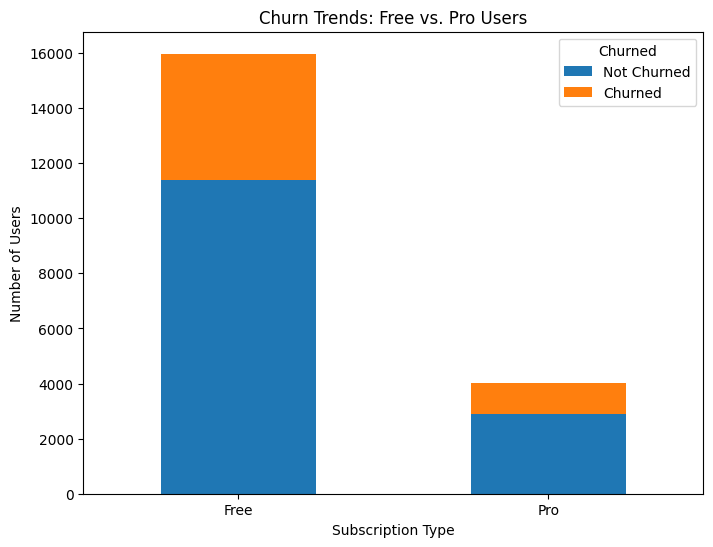

In [5]:
# Step 3: Compare churn trends between Free and Pro users
# Group by subscription type and churn status
churn_trends = df.groupby(['subscription_type', 'churned']).size().unstack()

# Plot churn trends
churn_trends.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Churn Trends: Free vs. Pro Users')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.legend(title='Churned', labels=['Not Churned', 'Churned'])
plt.show()

C:\Users\Sajid\AppData\Local\Temp\ipykernel_26760\2740902433.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = (height / churn_trends.sum(axis=1)[int(x)]) * 100
C:\Users\Sajid\AppData\Local\Temp\ipykernel_26760\2740902433.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = (height / churn_trends.sum(axis=1)[int(x)]) * 100
C:\Users\Sajid\AppData\Local\Temp\ipykernel_26760\2740902433.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by 

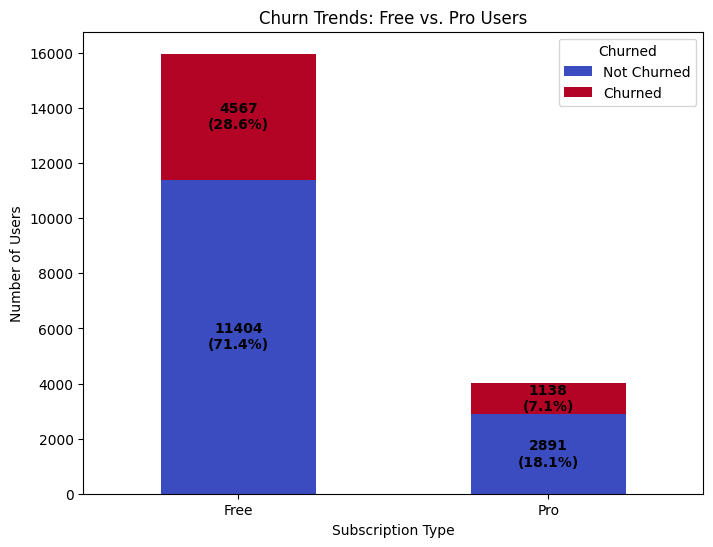

In [6]:


# Step 1: Group by subscription type and churn status
churn_trends = df.groupby(['subscription_type', 'churned']).size().unstack()

# Step 2: Convert to percentages
churn_percentage = churn_trends.div(churn_trends.sum(axis=1), axis=0) * 100

# Step 3: Plot churn trends with absolute numbers
ax = churn_trends.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')

# Step 4: Add text annotations for both absolute numbers & percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    if height > 0:  # Avoid labels for empty bars
        percentage = (height / churn_trends.sum(axis=1)[int(x)]) * 100
        ax.text(x + width/2, y + height/2, f'{int(height)}\n({percentage:.1f}%)', 
                ha='center', va='center', fontsize=10, color='black', fontweight='bold')

# Step 5: Format the plot
plt.title('Churn Trends: Free vs. Pro Users')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.legend(title='Churned', labels=['Not Churned', 'Churned'])
plt.show()
